In [1]:
! pip install mahotas

     |████████████████████████████████| 5.7 MB 1.8 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import mahotas
files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '.db' not in filename:
            files.append(os.path.join(dirname,filename))
            #print(os.path.join(dirname, filename))

In [3]:
## total files
len(files)

55116

In [4]:
Parasitized_Dir='../input/cell-images-for-detecting-malaria/null'
Uninfected_Dir='../input/cell-images-for-detecting-malaria/null'

In [5]:
pd.DataFrame(files).sample(frac=1).reset_index(drop=True)

0
0      /kaggle/input/cell-images-for-detecting-malari...
1      /kaggle/input/cell-images-for-detecting-malari...
2      /kaggle/input/cell-images-for-detecting-malari...
3      /kaggle/input/cell-images-for-detecting-malari...
4      /kaggle/input/cell-images-for-detecting-malari...
...                                                  ...
55111  /kaggle/input/cell-images-for-detecting-malari...
55112  /kaggle/input/cell-images-for-detecting-malari...
55113  /kaggle/input/cell-images-for-detecting-malari...
55114  /kaggle/input/cell-images-for-detecting-malari...
55115  /kaggle/input/cell-images-for-detecting-malari...

[55116 rows x 1 columns]

In [6]:
from sklearn.model_selection import train_test_split
class DetectMalaria:
    def __init__(self,para_dir,uninfect_dir):
        self.parasitized_dir=para_dir
        self.uninfected_dir=uninfect_dir
    def dataset(self,ratio,files):
        Dataset=pd.DataFrame(files,columns=['Path'])
        Dataset=Dataset.sample(frac=1).reset_index(drop=True)  
        trainfiles,testfiles=train_test_split(Dataset,test_size=ratio,random_state=None)
        return(trainfiles,testfiles)
    

In [7]:
x=DetectMalaria(Parasitized_Dir,Uninfected_Dir)

In [8]:
train_data,test_data=x.dataset(ratio=0.3,files=files)

In [9]:
def label(df):
    if 'Uninfected' in df:
        return 0
    else:
        return 1


train_data['label']=train_data['Path'].apply(label)
test_data['label']=test_data['Path'].apply(label)

In [10]:
train_data.iloc[0,0]

'/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C97P58ThinF_IMG_20150917_151551_cell_166.png'

Visulaize the image

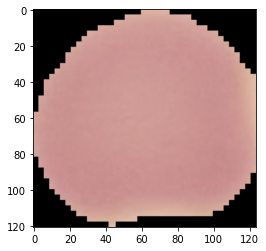

In [11]:
image=cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C65P26N_ThinF_IMG_20150818_154050_cell_160.png')
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In parasite images we can see that there are spots while there are 

In [12]:
import random

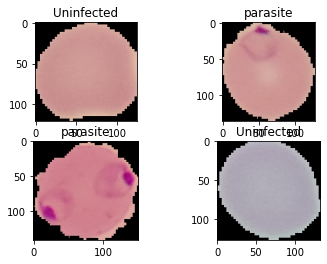

In [13]:
## plt random 4 pics
fig,ax=plt.subplots(2,2)

for i,axes in enumerate(ax.flatten()):
    image_path=random.choice(train_data['Path'].reset_index(drop=True))
    image=cv2.imread(image_path)
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    axes.imshow(image_rgb)
    if 'Uninfected' in image_path:
        axes.set_title('Uninfected')
    else:
        axes.set_title('parasite')
plt.show()

In [14]:
## read_image
image_gray= cv2.cvtColor(image,
                         cv2.COLOR_BGR2GRAY)
feature=cv2.HuMoments(cv2.moments(image_gray)).flatten()
print(feature)
print(mahotas.features.haralick(image_gray).mean(axis=0))

[9.35005162e-04 1.55725266e-08 9.49535877e-13 1.43010205e-14
 1.51590228e-27 1.78196852e-18 6.92296341e-28]
[ 5.81655253e-02  6.54945517e+02  9.39961586e-01  5.46531306e+03
  5.63361363e-01  2.65095014e+02  2.12063067e+04  4.81866856e+00
  6.39202594e+00  1.27416918e-03  2.32696991e+00 -4.07785841e-01
  9.80451405e-01]


In [15]:
## extract the features
 
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fd_haralick(image): 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick
 
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return(hist.flatten())

In [16]:
feature=[]
def dataframe(df):
        
    image=cv2.imread(df['Path'])
    print(df['Path'])
    global_feature = np.hstack([ fd_haralick(image), fd_hu_moments(image),df['label']]) 
    feature.append(global_feature)
    #scaler = MinMaxScaler(feature_range=(0, 1))
    #Normalize The feature vectors...
    #rescaled_features = scaler.fit_transform(global_features)

train_data.apply(dataframe,axis=1)


/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C97P58ThinF_IMG_20150917_151551_cell_166.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C182P143NThinF_IMG_20151201_172842_cell_26.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_104.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C99P60ThinF_IMG_20150918_142128_cell_83.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C188P149ThinF_IMG_20151203_135433_cell_138.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C222ThinF_IMG_20151115_151015_cell_190.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C149P110ThinF_IMG_20151115_114729_cell_179.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C222ThinF_IMG_20151115_150057_cell_148.png
/kaggle/input/cell-ima

41891    None
12981    None
24115    None
7357     None
20991    None
         ... 
53967    None
2249     None
15403    None
775      None
38042    None
Length: 38581, dtype: object

In [17]:
X_train=pd.DataFrame(feature).drop(columns=[20])
y_train=train_data['label']

In [18]:
feature=[]
test_data.apply(dataframe,axis=1)

/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C68P29N_ThinF_IMG_20150819_134504_cell_76.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C63P24N_ThinF_IMG_20150818_144456_cell_27.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C67P28N_ThinF_IMG_20150819_125901_cell_78.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C214ThinF_IMG_20151106_115440_cell_135.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C82P43ThinF_IMG_20150817_124010_cell_203.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C132P93ThinF_IMG_20151004_153030_cell_36.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C186P147NThinF_IMG_20151203_150132_cell_191.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C50P11thinF_IMG_20150724_115141_cell_27.png
/kaggl

9330     None
45132    None
19638    None
16369    None
199      None
         ... 
50016    None
26573    None
28543    None
19012    None
34925    None
Length: 16535, dtype: object

In [19]:
X_test=pd.DataFrame(feature).drop(columns=[20])
y_test=test_data['label']

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [24]:
## accuracy score
accuracy_score(y_test,pred)

0.9167825824009677

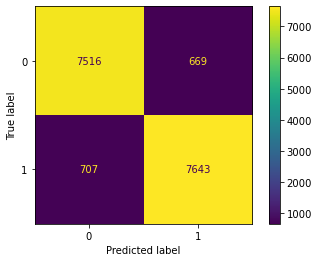

In [25]:
## confusion matrix
plot_confusion_matrix(svc,X_test,y_test)
plt.show()
## here 0 means uninfected and 1 means parasite